In [1]:
import numpy as np
import networkx as nx

import cirq

import matplotlib.pyplot as plt
%matplotlib inline

import pybobyqa

import sys, os
from time import time

In [2]:
libpath = os.path.abspath('..')
if libpath not in sys.path:
    sys.path.append(libpath)

In [3]:
from QubitRBM.qaoa import QAOA

In [4]:
nq = 14
k = 3

In [5]:
G = nx.random_regular_graph(k, nq)

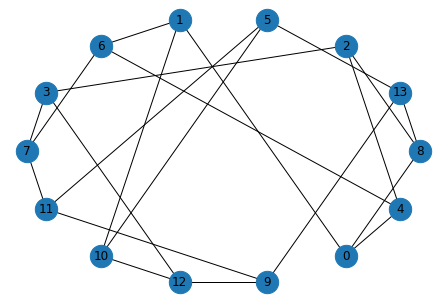

In [6]:
nx.draw_circular(G, node_size=500, with_labels=True)

In [7]:
qaoa = QAOA(G)

In [9]:
gamma_npts = 50
beta_npts = 50

In [10]:
gammas = np.linspace(0, np.pi/2, gamma_npts)
betas = np.linspace(-np.pi/4, np.pi/4, beta_npts)

In [11]:
costs = np.empty(shape=(gamma_npts, beta_npts))
# costs = np.load('../data/qaoa_14_qubits_landscape.npz')['costs']

In [12]:
%%time
for i, g in enumerate(gammas):
    for j, b in enumerate(betas):
        costs[i,j] = qaoa.cost_from_params([g, b], n_samples=25000)
        
    #print('Done with {} points'.format((i+1)*beta_npts))

In [13]:
%time sol = qaoa.optimize(n_samples=25000)

CPU times: user 4min 43s, sys: 5.2 s, total: 4min 48s
Wall time: 5min 12s


In [14]:
sol.f

9.495679999999997

In [15]:
sol.x

array([1.27304914, 0.47593058])

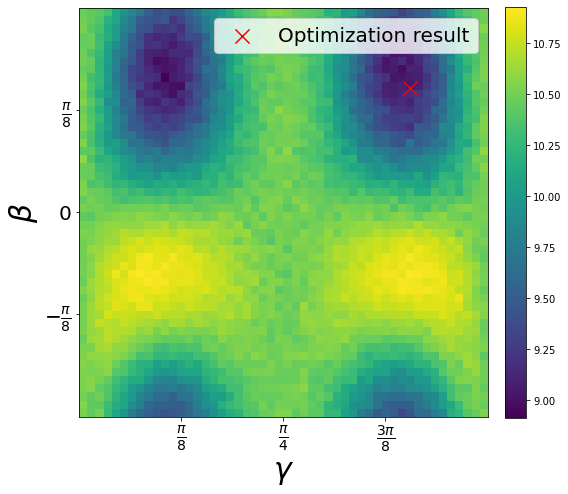

In [16]:
fig, ax = plt.subplots(figsize=[8,8])

m = ax.imshow(costs.T[::-1], extent=(0, np.pi/2, -np.pi/4, np.pi/4))

ax.set_xticks([np.pi/8, np.pi/4, 3*np.pi/8])
ax.set_xticklabels([r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$', r'$\frac{3\pi}{8}$'], fontsize=20)
ax.set_yticks([-np.pi/8, 0, np.pi/8])
ax.set_yticklabels([r'$-\frac{\pi}{8}$', r'$0$', r'$\frac{\pi}{8}$'], fontsize=20)

ax.set_xlabel(r'$\gamma $', fontsize=30)
ax.set_ylabel(r'$\beta $', rotation=90, fontsize=30)

fig.colorbar(m, ax=ax, fraction=0.046, pad=0.04)

ax.scatter([sol.x[0]], [sol.x[1]], marker='x', c='red', s=200, label='Optimization result')
ax.legend(frameon=True, fontsize=20)

plt.tight_layout()

#plt.savefig('qaoa_14_qubit_landscape.pdf')